This notebook contains the functions after reworking the corresponding sweeping function so it works prorerly with starting times different from 0, the correction so far is just ading the starting time to the new_time, this also simplifies the sweeping function, since now I don't have to recode it for the special case of $n=0$ .
So far I am going to olny work with fixed duration times, after the sweeping function for the time domain does what it is supossed to, I'll implement the corresponding sweeping with respect of duration.

1. Make seeping function work with intervals startinf in a  number $\neq 0$ $\checkmark$.
2. Make that function work for $n=0$, combining it with Pul $\checkmark$.
3. Modify then that funciton to act on the pulse list given the condition of Sweep time.  $\checkmark$.
4. Search and correct the bugs.
5. Implement Sweeping with Duration.

In [3]:
%matplotlib inline 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


In [2]:
Rabi={
    'Amplitude' : 10 ,
    'Start Duration' : 5,
    'End Duration': 5,
    'Start time' : 1e-10,
    'End time': 2e-10,
    'Sweep time': 0
}

In [3]:
Probe1={
    'Amplitude' : 2 ,
    'Start Duration' : 7,
    'End Duration': 7 ,
    'Start time' : 0,
    'End time': 20,
    'Sweep time': 1
}

In [4]:
Probe2={
    'Amplitude' : 6 ,
    'Start Duration' : 4,
    'End Duration': 4 ,
    'Start time' : 5,
    'End time': 11,
    'Sweep time': 1
}

In [5]:
Probe3={
    'Amplitude' : 5 ,
    'Start Duration' : 5,
    'End Duration': 5 ,
    'Start time' : 5,
    'End time': 10,
    'Sweep time': 1
}

## Different Pulse schemes given by different dictionaries

In [6]:
Pulses_List3=[Rabi,Probe1,Probe2];
Pulses_List=[Rabi,Probe1];
Pulses_List2=[Rabi,Probe2];

# Here are the new functions, making them so they call one another

In [7]:
def Pul(Pulse,t):
    "single pulse generating function"
    
    pol= Pulse['Amplitude']*( Pulse['Start time'] <= t <= Pulse['Start Duration'] + Pulse['Start time'])
    
    return pol

In [8]:
#sweeping function 
def sweep0(Pulse,N,n,t):
    """Sweeping function for a single pulse Pulse, with a total number of N points, stoping at the n point, at time t"""
    
    dt=(Pulse['End time'] - Pulse['Start time'])/N
    new_start=n*dt + Pulse['Start time']
    
    #dτ=(Pulse['End Duration'] - Pulse['Start Duration'])/N
    #new_duration= n*dτ  I dont use this yet and maybe this form of it is wrong
    
    pol= Pulse['Amplitude'] * (  new_start <=  t <= Pulse['End Duration'] + new_start)
    
    return pol

In [9]:
#sweep or not depending on the 'Sweep time' key
def sweep(Pulse,N,n,t):
    "Function that either perfoms a sweep or just leaves the Pulse at Startin time, depending on the Sweep parameter"
    "The Sweep is performed calling the sweep0 function"
    
    if Pulse['Sweep time'] == 0:
        pol=Pul(Pulse,t)
    if Pulse['Sweep time'] == 1:
        pol = sweep0(Pulse,N,n,t)
        
    return pol

# Tests to to see if sweep function works:

after implementing the condition given by Sweep time

## Time interval for plotting purposes:

In [10]:
trog=np.linspace(1e-10,20,1000) 

In [11]:
PulsoG={
    'Amplitude' : 6 ,
    'Start Duration' : 3,
    'End Duration': 3 ,
    'Start time' : 3,
    'End time': 9,
    'Sweep time': 1
}

In [12]:
obo20=np.array([sweep(PulsoG,100,100,x) for x in trog]); #sweep(Pulse,N,n,t)
obo0=np.array([sweep(PulsoG,100,0,x) for x in trog]);
obo10=np.array([sweep(PulsoG,100,50,x) for x in trog])

<IPython.core.display.Javascript object>


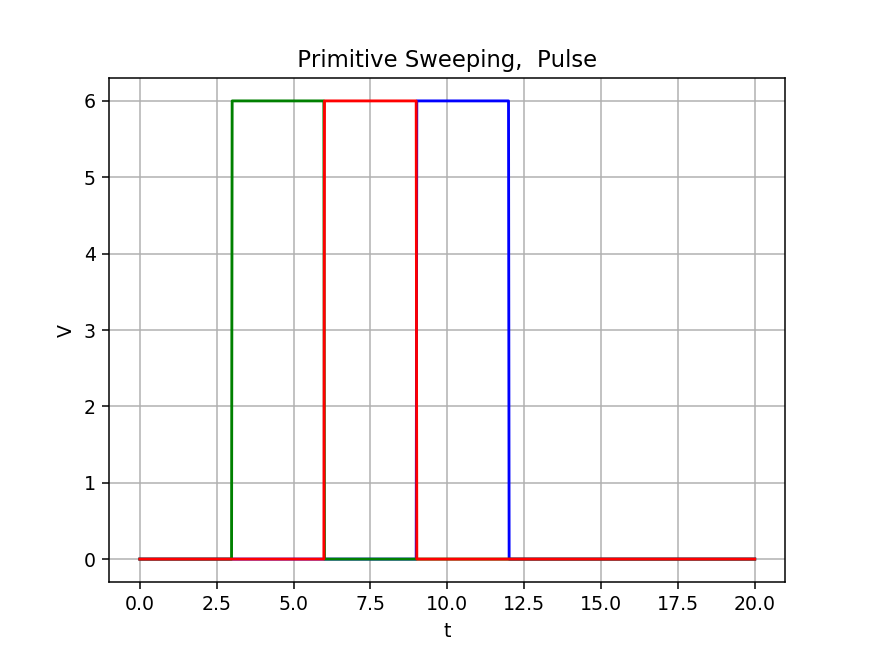

In [13]:
%matplotlib notebook

fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog,obo20,'-b',label='End Pulse')#blue  = end
plt.plot(trog,obo0,'-g',label='Start Pulse') #green = start
plt.plot(trog,obo10,'-r',label='Mittel Pulse') #red = mittel
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse ')
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

It seems that it works, there are some caviets when trying to sweep to the left, but that may be corrected easely by implementeng a function for the orientation of the sweeping, adding a orientation key to the pulse dictionary: 'right' or 'left'. When left is read, the corresponding function swaps 'start time' with 'end time'. I think for now I'll leave it like this, and when this base function works, I can start treating this caviets.

Now to implement the function that can read pulse schemes and implements the sweeping directly.

## List Version

adding also the direct implementation of the time interval for a given t


In [14]:
def Sweep(PulList,N,n,t):
    "function that perfoms or not a Sweeping for a Pulse Scheme given by a list of Pulses, the sweeping is determined by the"
    "value of the corresponding 'Sweep time' key: 1= sweeping, 0= no sweeping"
    
    time=np.linspace(-1e-10,t,1000)
    pulList=np.zeros((len(PulList),len(time))) #array of arrays, each entry will be an array corresponding to each pulse in Pulse list
    
    for i in range(0,len(PulList)):
        pulList[i]=np.array([sweep(PulList[i],N,n,x) for x in time])
    y=np.zeros(len(pulList[0]))
    for i in range(0,len(pulList)): #we add each entry of the array of pulses to get the Pulse scheme
        y += pulList[i]
        
    return y

# Some Tests

In [15]:
Pulses_List3=[Rabi,Probe1,Probe2];
Pulses_List=[Rabi,Probe1];
Pulses_List2=[Rabi,Probe2];

In [16]:
obos0=Sweep(Pulses_List,100,0,50);
obos50=Sweep(Pulses_List,100,50,50);
obos100=Sweep(Pulses_List,100,100,50);

# Ploting time range

In [26]:
trog1=np.linspace(1e-10,50,1000) #this should be the same as the one the function Sweep(PulList,N,n,t) implements

<IPython.core.display.Javascript object>


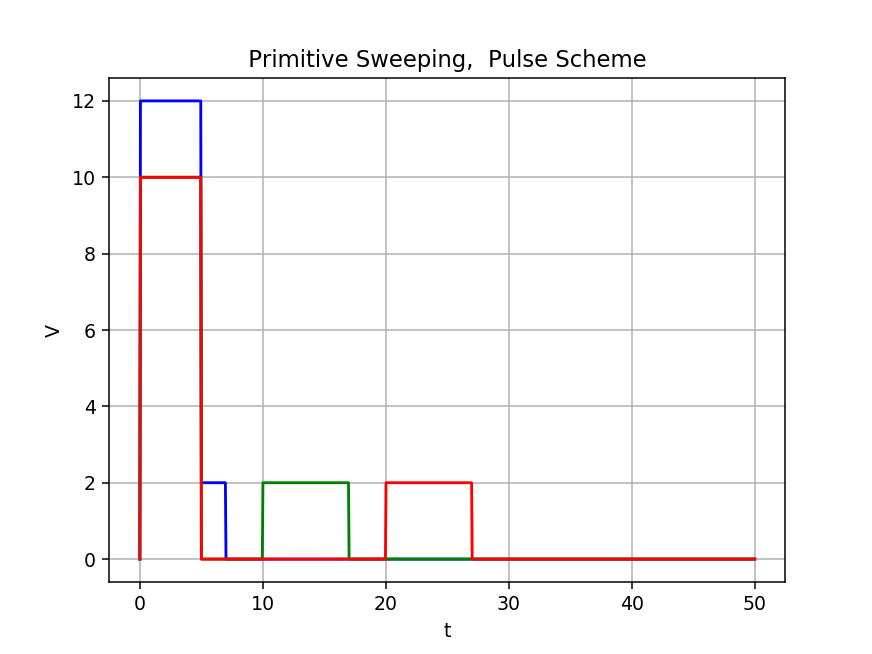

In [27]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog1,obos0,'-b',label='End Pulse')#blue  = start
plt.plot(trog1,obos50,'-g',label='Start Pulse') #green = mittel
plt.plot(trog1,obos100,'-r',label='Mittel Pulse') #red = end
ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse Scheme ')
#ax.legend(loc=0)
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

In [18]:
Rabi

{'Amplitude': 10,
 'Start Duration': 5,
 'End Duration': 5,
 'Start time': 1e-10,
 'End time': 2e-10,
 'Sweep time': 0}

In [19]:
Probe1

{'Amplitude': 2,
 'Start Duration': 7,
 'End Duration': 7,
 'Start time': 0,
 'End time': 20,
 'Sweep time': 1}

In [20]:
Probe2

{'Amplitude': 6,
 'Start Duration': 4,
 'End Duration': 4,
 'Start time': 5,
 'End time': 11,
 'Sweep time': 1}

In [21]:
Probe0={
    'Amplitude' : 2 ,
    'Start Duration' : 4,
    'End Duration':  4,
    'Start time' : 5,
    'End time': 40,
    'Sweep time': 1
}

In [22]:
PScheme=[Rabi,Probe0]

In [23]:
pobos0=Sweep(PScheme,100,0,50); #Sweep(PulseList,N,n,t)
pobos50=Sweep(PScheme,100,50,50);
pobos100=Sweep(PScheme,100,100,50);

In [28]:
trog2=np.linspace(1e-10,50,1000) #this should be the same as the one the function Sweep(PulList,N,n,t) implements

<IPython.core.display.Javascript object>


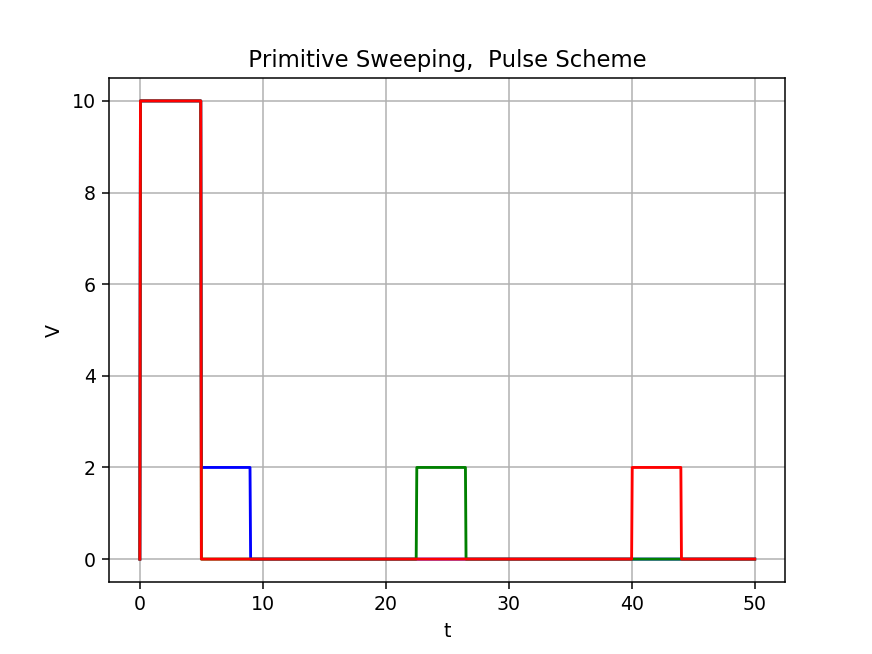

In [29]:
%matplotlib notebook
fig,ax= plt.subplots()



ax.grid(True)
plt.plot(trog2,pobos0,'-b',label='End Pulse')#blue  = start
plt.plot(trog2,pobos50,'-g',label='Start Pulse') #green = mittel
plt.plot(trog2,pobos100,'-r',label='Mittel Pulse') #red = end

ax.set_ylabel('V')
ax.set_xlabel('t')
ax.set_title(' Primitive Sweeping,  Pulse Scheme ')
plt.show()
#fig.savefig('Pulse_sweep_t=20',optimize=True,bbox_inches='tight')

There is something weird with the time scale, the plot doesnt give really a vertical step, rather it has some slope. The more points within the time interval, the more vertical de step will be, or equivalently, the less points the time interval has, the slope willbe more notorious, difference by plotting with step? this does gives a step plot, but sometimes the step is not at the correct time for the pulse, but a little displaced to the left.
I believe the reason for this, the time interval may not coincide with time step interval.